In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [24]:
K = np.complex(250,0)
k = np.complex(15,0)
E_p = K

def create_cat_state(m):
    N = 10
    a = destroy(10)
    a_dag = a.dag()
    #a_dag = create(10)
    
    r_not = (((4*m*m*E_p*E_p) - ((k*k)/4))/(4*K*K))**(1/4)
    theta_not = 0.5*np.arctan((k/(((16*m*m*E_p*E_p) - k*k)**(0.5))))
    a_not = r_not * np.exp(np.complex(0,theta_not))
    
    H_not = (-1)*K*a_dag*a_dag*a*a + (m*E_p*a_dag*a_dag + (m*E_p).conjugate()*a*a)
    H_eff = H_not - np.complex(0,1)*(k*a_dag*a*0.5)
    D = displace(N,a_not)
    
    H_eff_prime = D.dag()*H_eff*D
    s = coherent(N,a_not)
    return H_eff_prime*H_eff_prime.dag()

In [25]:
create_cat_state(14)

Quantum object: dims = [[10], [10]], shape = (10, 10), type = oper, isherm = True
Qobj data =
[[ 8.00976843e+08     +0.j         -2.39203911e+06-696649.69842953j
   6.16321314e+07-518134.08903487j -8.04193642e+07+671470.67738372j
   2.48873820e+07-233401.95772337j  4.36295016e+07-254890.56372877j
   8.47518520e+07-367186.20207683j -1.22784662e+08+641193.67109915j
  -9.99428352e+07+655968.43287936j  9.00287544e+07-580522.21460647j]
 [-2.39203911e+06+696649.69842953j  3.70522867e+08     +0.j
  -2.45098217e+08 -97675.77958343j  1.69300346e+08-590185.7364428j
   6.91324501e+06+244357.90311273j -4.47318365e+07 -90038.96917513j
  -9.53247816e+07+595433.77533352j  1.68410142e+08-779912.10156928j
   1.05158329e+08-813641.6700216j  -1.18020256e+08+755991.5606943j ]
 [ 6.16321314e+07+518134.08903487j -2.45098217e+08 +97675.77958343j
   3.08863460e+08     +0.j         -1.47932289e+08+220054.14482401j
   2.96240438e+06-316257.1757972j  -6.16087391e+07+200641.86992812j
   1.22114994e+08-502522.7696

In [26]:
def plot_wigner(r):
    figure, axis = plt.subplots(1, 1, figsize=(8,8))
    x = np.linspace(-7.5,7.5,200)
    W = wigner(r, x, x)
    print(W)
    limit = abs(W).max()
    axis.contourf(x, x, W, 1000, norm=mpl.colors.Normalize(-limit,limit), cmap=mpl.cm.get_cmap('RdBu'))
    print(abs(W).max())
    return figure, axis


[[1.20068401e-26 3.37281808e-26 9.36762260e-26 ... 9.49791119e-26
  3.41973696e-26 1.21738799e-26]
 [3.36415011e-26 9.44091258e-26 2.61951338e-25 ... 2.65630071e-25
  9.57350858e-26 3.41139882e-26]
 [9.31879995e-26 2.61257075e-25 7.24168752e-25 ... 7.34437397e-25
  2.64961673e-25 9.45092722e-26]
 ...
 [9.32279626e-26 2.61370524e-25 7.24487099e-25 ... 7.33097232e-25
  2.64482969e-25 9.43402257e-26]
 [3.36555439e-26 9.44490166e-26 2.62063348e-25 ... 2.65148847e-25
  9.55633349e-26 3.40533866e-26]
 [1.20117159e-26 3.37420401e-26 9.37151663e-26 ... 9.48082911e-26
  3.41364526e-26 1.21524029e-26]]
130086469.78073795


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef9376c400>)

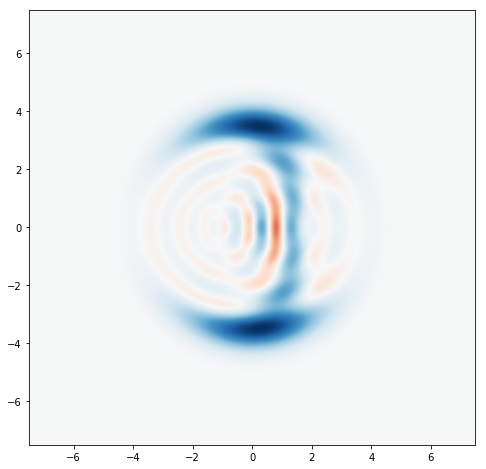

In [32]:
plot_wigner(create_cat_state(4))


[[2.98435405e-26 8.38320326e-26 2.32830805e-25 ... 2.36670529e-25
  8.52147211e-26 3.03357840e-26]
 [8.36422079e-26 2.34725779e-25 6.51272315e-25 ... 6.62105632e-25
  2.38630380e-25 8.50335036e-26]
 [2.31761576e-25 6.49751810e-25 1.80100816e-24 ... 1.83122419e-24
  6.60652360e-25 2.35649190e-25]
 ...
 [2.31983214e-25 6.50379263e-25 1.80276426e-24 ... 1.83104715e-24
  6.60589488e-25 2.35627126e-25]
 [8.37217173e-26 2.34951054e-25 6.51903334e-25 ... 6.62045442e-25
  2.38609016e-25 8.50260105e-26]
 [2.98717378e-26 8.39119898e-26 2.33054958e-25 ... 2.36650366e-25
  8.52075680e-26 3.03332764e-26]]
265444198.05907437


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef92f2d048>)

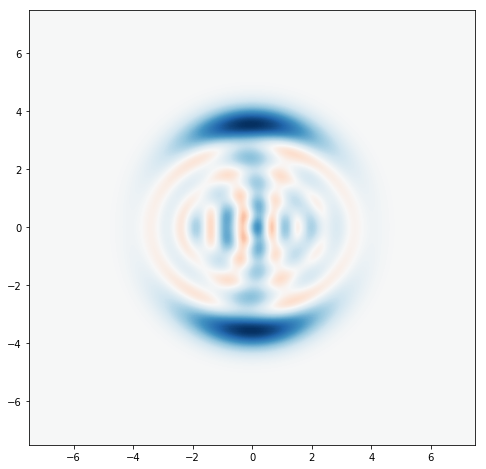

In [33]:
plot_wigner(create_cat_state(8))

[[6.23970671e-26 1.75358697e-25 4.87269460e-25 ... 5.87538795e-25
  2.11502682e-25 7.52772971e-26]
 [1.74715184e-25 4.90532691e-25 1.36169508e-24 ... 1.64488224e-24
  5.92704826e-25 2.11157592e-25]
 [4.83651044e-25 1.35655874e-24 3.76197060e-24 ... 4.55266392e-24
  1.64209593e-24 5.85587341e-25]
 ...
 [4.84100620e-25 1.35783104e-24 3.76553038e-24 ... 4.55461332e-24
  1.64279324e-24 5.85833961e-25]
 [1.74877121e-25 4.90991373e-25 1.36297956e-24 ... 1.64559060e-24
  5.92957965e-25 2.11247034e-25]
 [6.24547296e-26 1.75522165e-25 4.87727628e-25 ... 5.87793219e-25
  2.11593517e-25 7.53093613e-26]]
723142319.1571008


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef936c4438>)

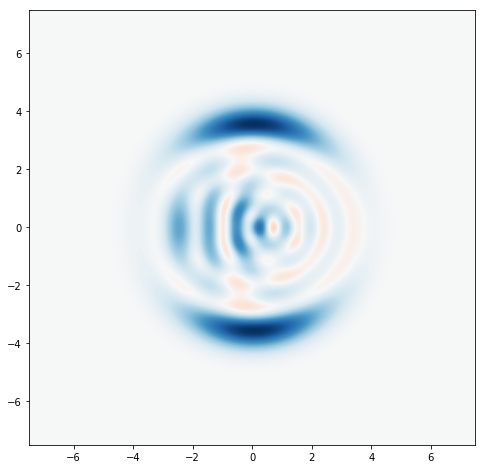

In [34]:

plot_wigner(create_cat_state(16))

[[1.88584944e-25 5.29444506e-25 1.46957007e-24 ... 1.04805816e-24
  3.77370598e-25 1.34346539e-25]
 [5.29726381e-25 1.48575274e-24 4.11996415e-24 ... 2.92821672e-24
  1.05540460e-24 3.76102509e-25]
 [1.47113085e-24 4.12214419e-24 1.14193769e-23 ... 8.08816198e-24
  2.91812444e-24 1.04093796e-24]
 ...
 [1.47054633e-24 4.12049291e-24 1.14147650e-23 ... 8.08414905e-24
  2.91668840e-24 1.04042990e-24]
 [5.29515965e-25 1.48515777e-24 4.11830098e-24 ... 2.92676707e-24
  1.05488631e-24 3.75919305e-25]
 [1.88510059e-25 5.29232578e-25 1.46897712e-24 ... 1.04754047e-24
  3.77185673e-25 1.34281230e-25]]
1441615296.9899232
[[1.51570588e-23 4.25804154e-23 1.18269423e-22 ... 1.00279881e-22
  3.60995248e-23 1.28488523e-23]
 [4.25167938e-23 1.19326002e-22 3.31110579e-22 ... 2.80301898e-22
  1.01005358e-22 3.59860134e-23]
 [1.17909677e-22 3.30596970e-22 9.16446845e-22 ... 7.74579499e-22
  2.79396000e-22 9.96416576e-23]
 ...
 [1.17905949e-22 3.30586431e-22 9.16417393e-22 ... 7.74526594e-22
  2.79377087e

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef9691ac88>)

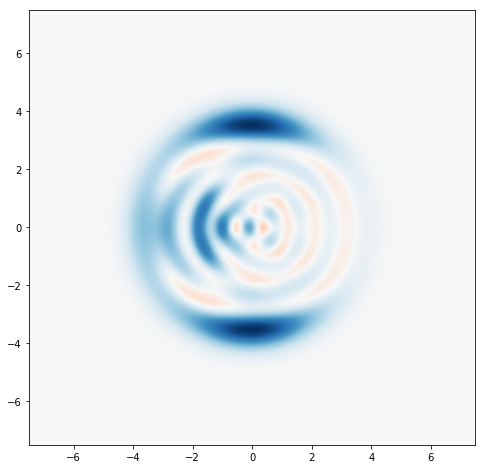

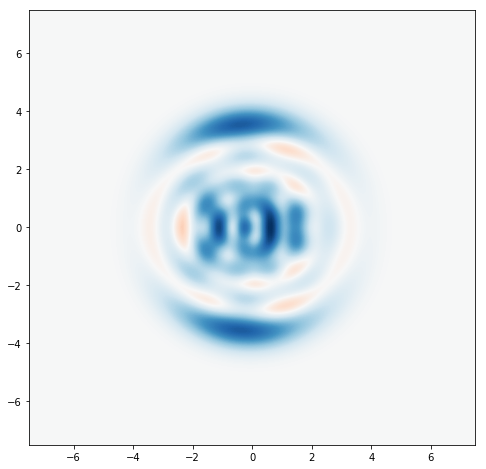

In [35]:

plot_wigner(create_cat_state(24))
plot_wigner(create_cat_state(256))

[[6.03055854e-24 1.69217617e-23 4.69452455e-23 ... 4.50155205e-23
  1.62230967e-23 5.78052603e-24]
 [1.69159449e-23 4.74195931e-23 1.31423432e-22 ... 1.25945617e-22
  4.54345710e-23 1.62049409e-23]
 [4.69124139e-23 1.31376646e-22 3.63745185e-22 ... 3.48370272e-22
  1.25800192e-22 4.49132557e-23]
 ...
 [4.69089368e-23 1.31366824e-22 3.63717755e-22 ... 3.48333559e-22
  1.25787058e-22 4.49086108e-23]
 [1.69146903e-23 4.74160457e-23 1.31413516e-22 ... 1.25932378e-22
  4.54298394e-23 1.62032690e-23]
 [6.03011097e-24 1.69204952e-23 4.69417018e-23 ... 4.50108015e-23
  1.62214115e-23 5.77993107e-24]]
30357438415.67739


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef95a96710>)

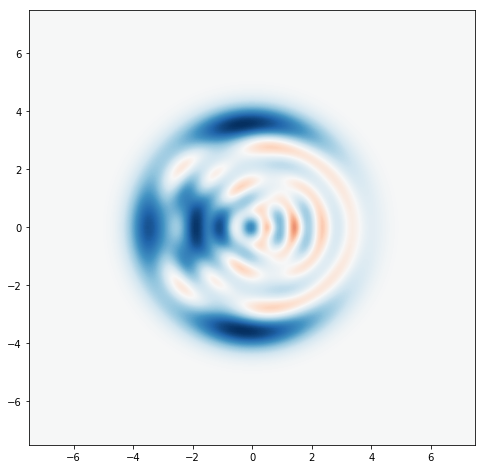

In [36]:

plot_wigner(create_cat_state(128))

[[1.51570588e-23 4.25804154e-23 1.18269423e-22 ... 1.00279881e-22
  3.60995248e-23 1.28488523e-23]
 [4.25167938e-23 1.19326002e-22 3.31110579e-22 ... 2.80301898e-22
  1.01005358e-22 3.59860134e-23]
 [1.17909677e-22 3.30596970e-22 9.16446845e-22 ... 7.74579499e-22
  2.79396000e-22 9.96416576e-23]
 ...
 [1.17905949e-22 3.30586431e-22 9.16417393e-22 ... 7.74526594e-22
  2.79377087e-22 9.96349726e-23]
 [4.25154431e-23 1.19322181e-22 3.31099890e-22 ... 2.80282819e-22
  1.00998544e-22 3.59836069e-23]
 [1.51565751e-23 4.25790457e-23 1.18265588e-22 ... 1.00273080e-22
  3.60970976e-23 1.28479959e-23]]
150767072157.94604


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef95b2ef98>)

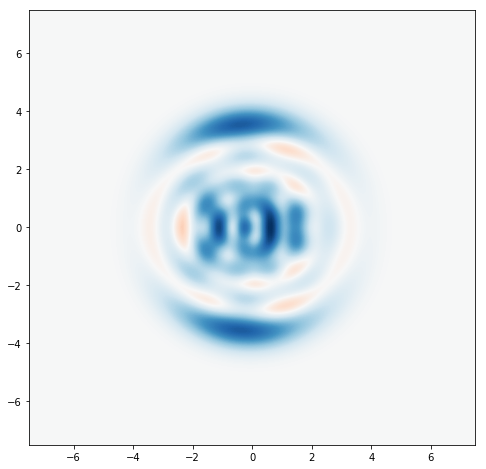

In [37]:

plot_wigner(create_cat_state(256))

[[5.46210689e-23 1.53472620e-22 4.26359959e-22 ... 4.59350967e-22
  1.65363257e-22 5.88578551e-23]
 [1.53011226e-22 4.29505762e-22 1.19202479e-21 ... 1.28521354e-21
  4.63123094e-22 1.65000172e-22]
 [4.23763310e-22 1.18833552e-21 3.29473934e-21 ... 3.55497138e-21
  1.28229822e-21 4.57303391e-22]
 ...
 [4.23767045e-22 1.18834611e-21 3.29476904e-21 ... 3.55494213e-21
  1.28228776e-21 4.57299694e-22]
 [1.53012563e-22 4.29509557e-22 1.19203544e-21 ... 1.28520310e-21
  4.63119364e-22 1.64998854e-22]
 [5.46215422e-23 1.53473965e-22 4.26363735e-22 ... 4.59347283e-22
  1.65361942e-22 5.88573908e-23]]
694649912782.4805


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef9511bb38>)

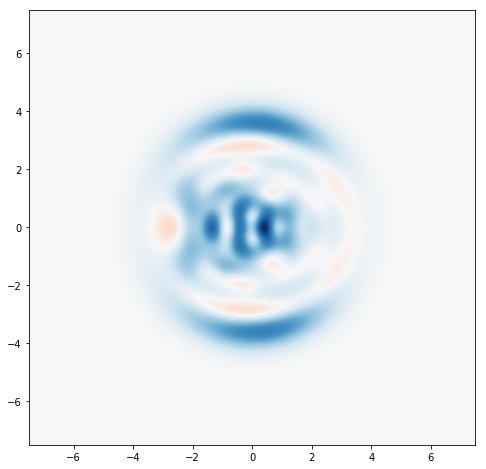

In [38]:

plot_wigner(create_cat_state(512))

[[6.48911666e-22 1.81961948e-21 5.04463375e-21 ... 5.21871525e-21
  1.88234448e-21 6.71254853e-22]
 [1.81932669e-21 5.09652569e-21 1.41152020e-20 ... 1.46075218e-20
  5.27407443e-21 1.88262620e-21]
 [5.04299079e-21 1.41128748e-20 3.90469652e-20 ... 4.04234849e-20
  1.46097408e-20 5.22028910e-21]
 ...
 [5.04299381e-21 1.41128833e-20 3.90469892e-20 ... 4.04234487e-20
  1.46097279e-20 5.22028455e-21]
 [1.81932776e-21 5.09652874e-21 1.41152106e-20 ... 1.46075088e-20
  5.27406979e-21 1.88262456e-21]
 [6.48912042e-22 1.81962055e-21 5.04463677e-21 ... 5.21871063e-21
  1.88234283e-21 6.71254274e-22]]
1748307129292.9631


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef9510ae10>)

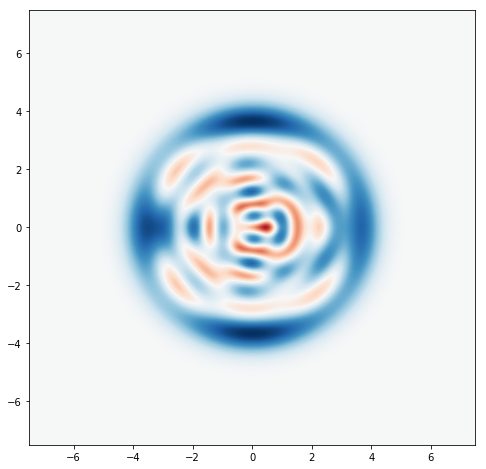

In [39]:

plot_wigner(create_cat_state(1024))

[[2.77591436e-21 7.78253611e-21 2.15719007e-20 ... 2.08440201e-20
  7.52014506e-21 2.68240449e-21]
 [7.78307988e-21 2.17988984e-20 6.03621988e-20 ... 5.83058541e-20
  2.10569467e-20 7.51843053e-21]
 [2.15749017e-20 6.03663756e-20 1.66987487e-19 ... 1.61244158e-19
  5.82922320e-20 2.08344012e-20]
 ...
 [2.15749263e-20 6.03664448e-20 1.66987680e-19 ... 1.61244366e-19
  5.82923065e-20 2.08344276e-20]
 [7.78308872e-21 2.17989234e-20 6.03622687e-20 ... 5.83059290e-20
  2.10569736e-20 7.51844004e-21]
 [2.77591751e-21 7.78254503e-21 2.15719257e-20 ... 2.08440468e-20
  7.52015461e-21 2.68240787e-21]]
8384389844432.506


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef91986320>)

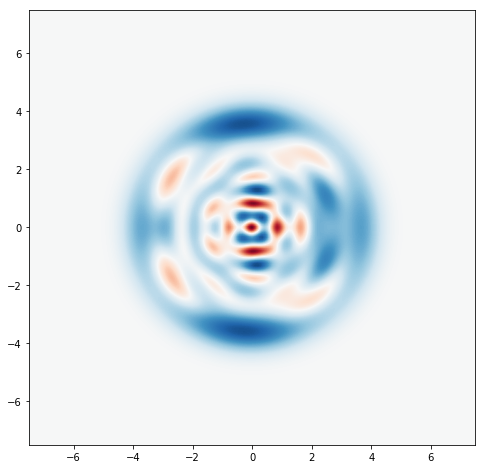

In [40]:

plot_wigner(create_cat_state(2048))

[[9.47582489e-21 2.65645492e-20 7.36274540e-20 ... 7.14175590e-20
  2.57651107e-20 9.18995004e-21]
 [2.65663685e-20 7.44020053e-20 2.06008067e-19 ... 1.99756345e-19
  7.21383243e-20 2.57561481e-20]
 [7.36375405e-20 2.06022175e-19 5.69863541e-19 ... 5.52377567e-19
  1.99684766e-19 7.13671489e-20]
 ...
 [7.36375779e-20 2.06022281e-19 5.69863836e-19 ... 5.52378187e-19
  1.99684988e-19 7.13672275e-20]
 [2.65663820e-20 7.44020437e-20 2.06008174e-19 ... 1.99756568e-19
  7.21384042e-20 2.57561763e-20]
 [9.47582976e-21 2.65645630e-20 7.36274927e-20 ... 7.14176385e-20
  2.57651391e-20 9.18996008e-21]]
32547092210667.066


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef9105e860>)

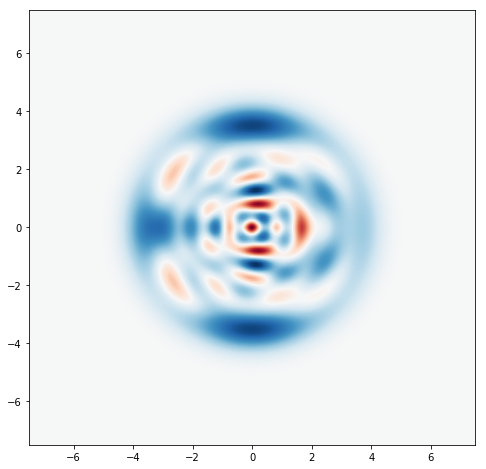

In [41]:

plot_wigner(create_cat_state(4096))